# Bayesian Flow Networks

The 'Bayesian Flow Networks' paper is a new generative modelling approach proposed by Alex Graves et al (2023). The paper sets out a general mathematical framework to transform a known distribution into a target distribution for Continuous, Discretised Continuous and Discrete settings. Although, closely related to Diffusion based models it differs in several key aspects. This notebook will run through each step trying to make the process as clear as possible.

Although the paper starts with the 'general' framework and then customises it to each of the use cases, this post will focus first on the discrete case.


In [1]:
%load_ext autoreload
%autoreload 2
import os
import random
from math import inf
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch_ema
import torchvision
import torchvision.transforms as transforms
from torch.nn.functional import relu
from torch.optim import AdamW
from tqdm.auto import notebook_tqdm

from dataset import DynamicallyBinarizedMNISTDataLoaders, DynamicallyBinarizedMNIST
from utility_functions import show_samples

/Users/rupertmenneer/Documents/ml/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
dyn_binarised_mnist_dls = DynamicallyBinarizedMNISTDataLoaders();

Number of data points in the training dataset: 3750
Number of data points in the training dataset: 625


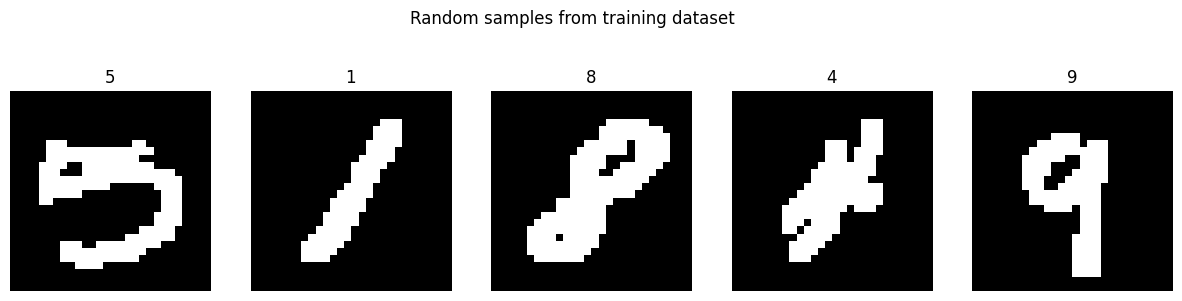

In [4]:
print(f"Number of data points in the training dataset: {len(dyn_binarised_mnist_dls.train_loader)}")
print(f"Number of data points in the training dataset: {len(dyn_binarised_mnist_dls.test_loader)}")
show_samples(dyn_binarised_mnist_dls.train_loader, 5, "Random samples from training dataset")